In [1]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from util.VisualizeDataset import VisualizeDataset
from util import util
plt.rcParams["figure.figsize"] = [15,5]

In [ ]:
given_dataw_path = "data/given/"
output_path = "data/intermediate/"
raw_data_path = "data/raw_data/processed_data/"
output_data_path = "data/raw_data/processed_data/ch5_"
timecol = "Time (s)"

In [3]:
accraw = pd.read_csv(raw_data_path + "Accelerometer.csv")
timecol = "Time (s)"
accfeatures = list()
for col in accraw:
    if (col != timecol) and \
    (col != "Absolute acceleration (m/s^2)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        accfeatures.append(col)
accfeatures

['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)', 'Acceleration z (m/s^2)']

In [4]:
gyraw = pd.read_csv(raw_data_path + "Gyroscope.csv")
gyfeatures = list()
for col in gyraw:
    if (col != timecol) and \
    (col != "Absolute (rad/s)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        gyfeatures.append(col)
gyfeatures

['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']

In [5]:
lightraw= pd.read_csv(raw_data_path + "Light.csv")
lightfeatures = list()
for col in lightraw:
    if (col != timecol) and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        lightfeatures.append(col)
lightfeatures

['Illuminance (lx)']

In [6]:
locraw = pd.read_csv(raw_data_path + "Location.csv")
locfeatures = list()
for col in locraw:
    if (col != timecol) and \
    (col != "Satellites") and \
    (col != "Height (m)") and \
    (col != "Direction (°)") and \
    (col != "Horizontal Accuracy (m)") and \
    (col != "Vertical Accuracy (m)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        locfeatures.append(col)
locfeatures

['Latitude (°)', 'Longitude (°)', 'Velocity (m/s)']

In [7]:
magraw= pd.read_csv(raw_data_path + "Magnetometer.csv")
magfeatures = list()
for col in magraw:
    if (col != timecol) and \
    (col != "Absolute field (µT)") and \
    (col != "Unnamed: 0") and \
    (col != "Unnamed: 1"):
        magfeatures.append(col)
magfeatures

['Magnetic field x (µT)', 'Magnetic field y (µT)', 'Magnetic field z (µT)']

In [ ]:
Dataset_given = CreateDataset(given_dataw_path, 250)

Dataset_given.add_numerical_dataset("accelerometer_phone.csv", "timestamps", ["x", "y", "z"], "avg", "acc_")

Dataset_given.add_numerical_dataset("gyroscope_phone.csv", "timestamps", ["x", "y", "z"], "avg", "gyr_")
    
Dataset_given.add_numerical_dataset("light_phone.csv", "timestamps", ["lux"], "avg", "lux_")
    
Dataset_given.add_numerical_dataset("location_phone.csv", "timestamps", ["latitude", "longitude", "speed"], "avg", "loc_")
    
Dataset_given.add_numerical_dataset("magnetometer_phone.csv", "timestamps", ["x", "y", "z"], "avg", "mag_")
    
Dataset_given.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset_given = Dataset_given.data_table
    
Dataviz_given = VisualizeDataset()
    
Dataviz_given.plot_dataset_boxplot(dataset_given, ['acc_x', 'acc_y', 'acc_z'])
Dataviz_given.plot_dataset_boxplot(dataset_given, ['gyr_x', 'gyr_y', 'gyr_z'])
Dataviz_given.plot_dataset_boxplot(dataset_given, ['lux_lux'])
Dataviz_given.plot_dataset_boxplot(dataset_given, ['loc_latitude', 'loc_longitude', "loc_speed"])
Dataviz_given.plot_dataset_boxplot(dataset_given, ['mag_x', 'mag_y', 'mag_z'])

Dataviz_given.plot_dataset(dataset_given, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                            ["like", "like", "like", "like", "like", "like"], \
                            ["line", "line", "line", "line", "line", "points"])
   
    
util.print_statistics(dataset_given)

Reading data from accelerometer_phone.csv
Reading data from gyroscope_phone.csv
Reading data from light_phone.csv


In [ ]:
dataset_given

In [ ]:
dataset_given.to_csv(output_data_path + "_given_dataset.csv")

Reading data from Accelerometer.csv
Reading data from Gyroscope.csv
Reading data from Light.csv
Reading data from Location.csv
Reading data from Magnetometer.csv
Reading data from labels.csv
Figure saved to figures/figure_1.png


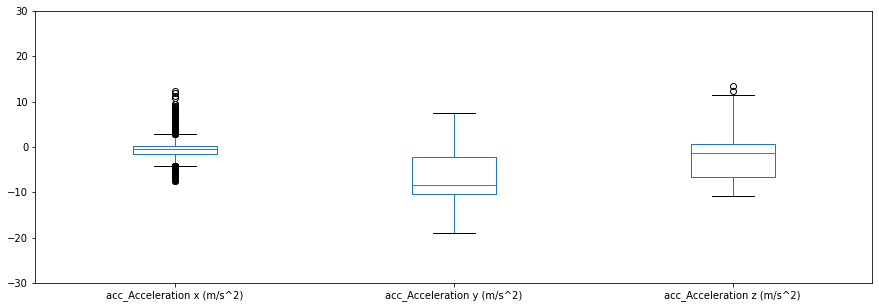

Figure saved to figures/figure_2.png


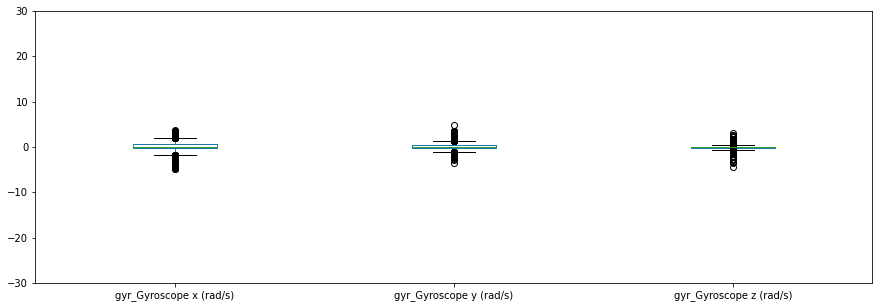

Figure saved to figures/figure_3.png


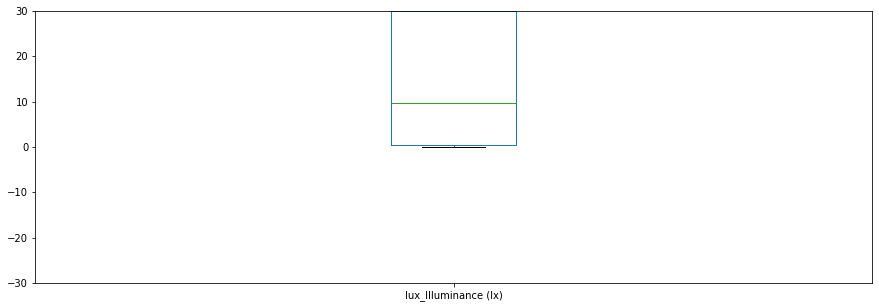

Figure saved to figures/figure_4.png


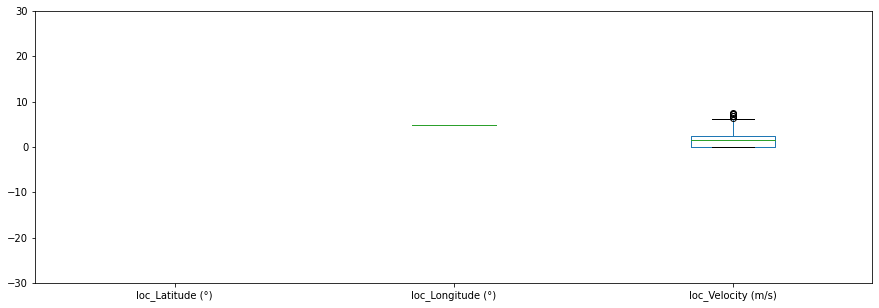

Figure saved to figures/figure_5.png


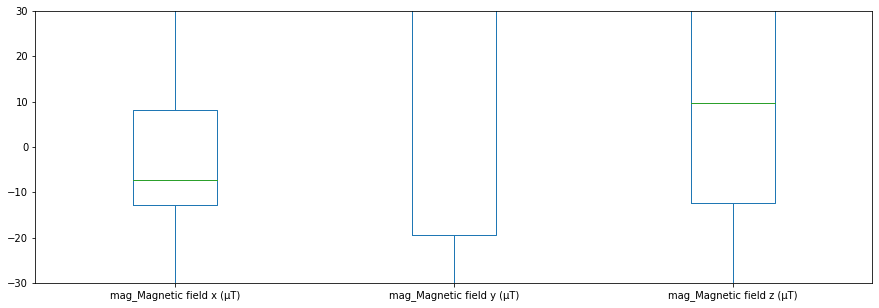

Figure saved to figures/figure_6.png


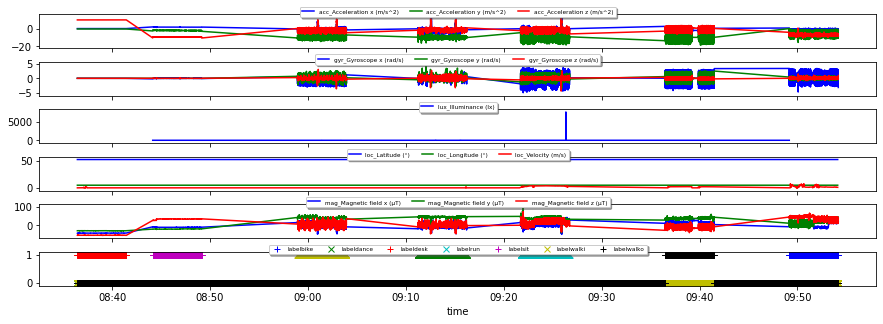

       gyr_Gyroscope x (rad/s)  gyr_Gyroscope y (rad/s)  gyr_Gyroscope z (rad/s)  lux_Illuminance (lx)  loc_Latitude (°)  loc_Longitude (°)  loc_Velocity (m/s)  mag_Magnetic field x (µT)  mag_Magnetic field y (µT)  mag_Magnetic field z (µT)  labelbike  labeldance  labeldesk   labelrun   labelsit  labelwalki  labelwalko
count                 8408.000                 8408.000                 8408.000                76.000          1356.000           1356.000            1356.000                   8408.000                   8408.000                   8408.000  18655.000   18655.000  18655.000  18655.000  18655.000   18655.000   18655.000
mean                    -0.006                    0.092                   -0.019               441.299            52.331              4.866               1.535                     -6.164                     18.408                      5.513      0.064       0.064      0.064      0.064      0.064       0.064       0.064
std                      1.446       

In [13]:
Dataset_obtained = CreateDataset(raw_data_path, 250)

Dataset_obtained.add_numerical_dataset("Accelerometer.csv", timecol, accfeatures, "avg", "acc_")
Dataset_obtained.add_numerical_dataset("Gyroscope.csv", timecol, gyfeatures, "avg", "gyr_")
Dataset_obtained.add_numerical_dataset("Light.csv", timecol, lightfeatures, "avg", "lux_")
Dataset_obtained.add_numerical_dataset("Location.csv", timecol, locfeatures, "avg", "loc_")
Dataset_obtained.add_numerical_dataset("Magnetometer.csv", timecol, magfeatures, "avg", "mag_")
Dataset_obtained.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset_obtained = Dataset_obtained.data_table
Dataviz_obtained = VisualizeDataset()

Dataviz_obtained.plot_dataset_boxplot(dataset_obtained, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])
Dataviz_obtained.plot_dataset_boxplot(dataset_obtained, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])
Dataviz_obtained.plot_dataset_boxplot(dataset_obtained, ['lux_Illuminance (lx)'])
Dataviz_obtained.plot_dataset_boxplot(dataset_obtained, ['loc_Latitude (°)', 'loc_Longitude (°)', "loc_Velocity (m/s)"])
Dataviz_obtained.plot_dataset_boxplot(dataset_obtained, ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'])



Dataviz_obtained.plot_dataset(dataset_obtained, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                        ["like", "like", "like", "like", "like", "like"], \
                        ["line", "line", "line", "line", "line", "points"])


util.print_statistics(dataset_obtained)

In [19]:
dataset_given

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,...,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
2016-02-08 18:28:25.656222395,-0.0904314,0.164098,9.63176,-0.008824,0.018529,-0.001647,NaN,NaN,NaN,NaN,...,-138.000000,-29.022000,0,0,0,0,0,0,0,0
2016-02-08 18:28:25.906222395,-0.0976,0.16764,9.63174,-0.008800,0.018540,-0.001540,1084.0,NaN,NaN,NaN,...,-139.552500,-28.970000,0,0,0,0,0,0,0,0
2016-02-08 18:28:26.156222395,-0.08912,0.16752,9.6373,-0.008880,0.018340,-0.002420,1084.0,NaN,NaN,NaN,...,-141.259200,-28.555200,0,0,0,0,0,0,0,0
2016-02-08 18:28:26.406222395,-0.0901346,0.166019,9.63254,-0.008962,0.018288,-0.002038,1086.0,NaN,NaN,NaN,...,-141.133846,-28.954615,0,0,0,0,0,0,0,0
2016-02-08 18:28:26.656222395,-0.0906078,0.167686,9.63008,-0.008760,0.018800,-0.002260,1084.0,NaN,NaN,NaN,...,-141.314400,-28.795200,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:41:03.906222395,-0.16302,0.184061,9.60957,-0.008592,0.021347,0.002082,NaN,NaN,NaN,NaN,...,27.660000,-10.533333,0,0,0,0,0,0,0,0
2016-02-08 20:41:04.156222395,-0.162686,0.185196,9.61186,-0.008745,0.021294,0.002000,32.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
2016-02-08 20:41:04.406222395,-0.15998,0.1868,9.61502,-0.008480,0.020960,0.002200,32.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
2016-02-08 20:41:04.656222395,-0.158882,0.184333,9.61351,-0.008529,0.020882,0.002314,32.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [16]:
dataset_given.columns

Index(['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'lux_lux',
       'loc_latitude', 'loc_longitude', 'loc_speed', 'mag_x', 'mag_y', 'mag_z',
       'labelOnTable', 'labelSitting', 'labelWashingHands', 'labelWalking',
       'labelStanding', 'labelDriving', 'labelEating', 'labelRunning'],
      dtype='object')

In [20]:
dataset_obtained

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 08:36:26.816535552,0.0365469,-0.413988,9.93308,0.000925,0.001020,0.000860,NaN,52.334314,4.866964,0.0,-42.480555,-29.510528,-53.944618,0,0,1,0,0,0,0
2021-06-05 08:36:27.066535552,0.0384584,-0.4106,9.9262,0.001178,0.000995,0.000796,NaN,NaN,NaN,NaN,-42.042138,-29.635504,-54.179348,0,0,1,0,0,0,0
2021-06-05 08:36:27.316535552,0.0403941,-0.413093,9.92691,0.001111,0.000943,0.000502,NaN,NaN,NaN,NaN,-42.356174,-29.556420,-54.101409,0,0,1,0,0,0,0
2021-06-05 08:36:27.566535552,0.0379503,-0.412318,9.92623,0.001102,0.000940,0.000633,NaN,NaN,NaN,NaN,-42.442798,-29.204040,-54.113833,0,0,1,0,0,0,0
2021-06-05 08:36:27.816535552,0.0349741,-0.409512,9.93189,0.001243,0.001234,0.000796,NaN,NaN,NaN,NaN,-42.515800,-29.500013,-54.508421,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 09:54:09.316535552,-1.20627,-2.99842,-6.6531,-1.909578,-0.268146,0.427650,NaN,NaN,NaN,NaN,16.972640,28.263506,39.380895,1,0,0,0,0,0,0
2021-06-05 09:54:09.566535552,-0.339301,-3.70138,-6.51832,2.835989,0.443934,-0.038863,NaN,NaN,NaN,NaN,17.563350,31.381466,35.527515,1,0,0,0,0,0,0
2021-06-05 09:54:09.816535552,-0.247886,-11.1194,-8.39067,0.886565,-0.109226,0.003588,NaN,NaN,NaN,NaN,18.865706,39.960369,10.103960,1,0,0,0,0,0,0
2021-06-05 09:54:10.066535552,-0.393865,-8.93717,-7.2472,-2.348488,-0.453024,-0.030903,NaN,NaN,NaN,NaN,15.334604,35.668764,20.007892,1,0,0,0,0,0,0


In [17]:
dataset_obtained.columns

Index(['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)',
       'acc_Acceleration z (m/s^2)', 'gyr_Gyroscope x (rad/s)',
       'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)',
       'lux_Illuminance (lx)', 'loc_Latitude (°)', 'loc_Longitude (°)',
       'loc_Velocity (m/s)', 'mag_Magnetic field x (µT)',
       'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)', 'labelbike',
       'labeldance', 'labeldesk', 'labelrun', 'labelsit', 'labelwalki',
       'labelwalko'],
      dtype='object')

In [18]:
dataset_given_walking = dataset_given[dataset_given['labelWalking'] == 1]
dataset_given_walking 

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,...,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
2016-02-08 18:59:39.156222395,-1.53354,5.64964,8.15312,-0.652240,-0.687660,-0.190080,494.0,NaN,NaN,NaN,...,-5.503200,-40.682400,0,0,0,1,0,0,0,0
2016-02-08 18:59:39.406222395,0.658216,2.31978,9.72627,-0.229725,-0.833314,0.030922,1069.0,NaN,NaN,NaN,...,4.393846,-43.823077,0,0,0,1,0,0,0,0
2016-02-08 18:59:39.656222395,1.10092,2.36224,7.92914,-0.211620,-0.710680,0.059380,1325.0,NaN,NaN,NaN,...,5.517600,-46.692000,0,0,0,1,0,0,0,0
2016-02-08 18:59:39.906222395,3.03443,2.4191,9.90694,-0.316000,-0.423720,-0.044100,NaN,NaN,NaN,NaN,...,7.232500,-46.952500,0,0,0,1,0,0,0,0
2016-02-08 18:59:40.156222395,2.83982,2.02855,9.56508,0.297260,0.454560,-0.439900,1574.5,NaN,NaN,NaN,...,9.930000,-46.056923,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:25:42.406222395,-1.88674,4.1986,9.2298,-0.574160,-0.019120,0.265580,735.0,NaN,NaN,NaN,...,3.417600,-36.081600,0,0,0,1,0,0,0,0
2016-02-08 20:25:42.656222395,-1.59347,3.01339,8.69549,0.034706,-0.190020,0.344471,712.0,NaN,NaN,NaN,...,4.790400,-37.377600,0,0,0,1,0,0,0,0
2016-02-08 20:25:42.906222395,-1.56368,4.51348,8.53786,0.261440,0.229040,0.102300,407.0,NaN,NaN,NaN,...,2.109600,-38.335200,0,0,0,1,0,0,0,0
2016-02-08 20:25:43.156222395,-1.931,4.55708,8.44614,0.604235,0.621294,-0.039647,179.0,NaN,NaN,NaN,...,-3.309231,-34.737692,0,0,0,1,0,0,0,0


In [31]:
dataset_obtained_walking_i = dataset_obtained[dataset_obtained['labelwalki'] == 1]
dataset_obtained_walking_i

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 08:58:55.816535552,-0.394428,-10.7251,0.177957,0.496622,0.701285,0.247644,0.0,52.334327,4.866957,0.0,14.660018,42.439600,6.489424,0,0,0,0,0,1,0
2021-06-05 08:58:56.066535552,-2.54128,-12.2118,-0.0302274,-1.850415,0.116822,-0.199714,NaN,NaN,NaN,NaN,14.803209,40.215350,11.705354,0,0,0,0,0,1,0
2021-06-05 08:58:56.316535552,-2.77526,-7.52406,-1.514,-0.910217,-0.742119,0.173793,NaN,NaN,NaN,NaN,17.828840,31.886157,23.936313,0,0,0,0,0,1,0
2021-06-05 08:58:56.566535552,-3.48406,-9.56663,-4.95949,0.739257,0.082743,0.023026,NaN,NaN,NaN,NaN,19.713424,33.160822,20.947425,0,0,0,0,0,1,0
2021-06-05 08:58:56.816535552,-1.51795,-10.233,-0.513509,1.035597,0.865894,-0.276584,NaN,NaN,NaN,NaN,17.200524,38.247684,16.560705,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 09:03:54.816535552,0.0132696,-10.4154,0.304656,1.267899,0.549309,0.068136,NaN,NaN,NaN,NaN,-19.437445,41.437357,16.887705,0,0,0,0,0,1,0
2021-06-05 09:03:55.066535552,-0.419126,-9.10028,-0.467051,1.018116,0.120636,0.130802,NaN,NaN,NaN,NaN,-19.722889,44.311086,4.292837,0,0,0,0,0,1,0
2021-06-05 09:03:55.316535552,0.583781,-13.4001,0.107259,-1.412184,-0.516696,-0.118676,NaN,NaN,NaN,NaN,-17.688825,44.823067,0.635538,0,0,0,0,0,1,0
2021-06-05 09:03:55.566535552,-0.39689,-7.97184,-0.381492,-1.611007,-1.855598,-0.567614,NaN,NaN,NaN,NaN,-12.872012,35.978536,29.835862,0,0,0,0,0,1,0


In [32]:
dataset_obtained_walking_o = dataset_obtained[dataset_obtained['labelwalko'] == 1]
dataset_obtained_walking_o

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 09:36:30.066535552,2.55471,-13.8677,-2.86041,0.038730,0.599943,0.325027,0.0,NaN,NaN,NaN,10.697818,28.157866,-27.216541,0,0,0,0,0,0,1
2021-06-05 09:36:30.316535552,-2.89683,-11.6568,2.33788,-3.384259,-1.259445,-0.592360,NaN,52.325091,4.868114,0.0,5.834062,36.956156,-10.236673,0,0,0,0,0,0,1
2021-06-05 09:36:30.566535552,-3.53097,-10.4566,-5.03632,-0.071030,-0.874490,-0.133806,NaN,NaN,NaN,NaN,2.933685,39.594559,4.976115,0,0,0,0,0,0,1
2021-06-05 09:36:30.816535552,-0.955254,-7.71011,1.48449,2.789519,2.197704,-0.166080,NaN,NaN,NaN,NaN,0.722226,38.391341,-8.195172,0,0,0,0,0,0,1
2021-06-05 09:36:31.066535552,1.53729,-13.5442,-1.54458,-0.101273,0.681849,0.052998,NaN,NaN,NaN,NaN,10.278966,30.328204,-25.983907,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 09:41:29.066535552,-0.471827,-7.88157,2.33595,2.723018,2.150922,-0.255197,NaN,NaN,NaN,NaN,5.463558,42.618964,-10.577664,0,0,0,0,0,0,1
2021-06-05 09:41:29.316535552,1.31576,-13.3632,-2.00217,-0.027877,0.726527,0.210814,NaN,NaN,NaN,NaN,15.976216,32.787781,-28.049766,0,0,0,0,0,0,1
2021-06-05 09:41:29.566535552,-2.14177,-9.77595,3.33423,-3.042845,-1.809376,-0.684246,NaN,NaN,NaN,NaN,10.476082,41.843053,-7.094898,0,0,0,0,0,0,1
2021-06-05 09:41:29.816535552,-4.46615,-11.3624,-3.63003,0.409330,-0.610869,-0.324386,NaN,NaN,NaN,NaN,5.933687,43.991321,2.220252,0,0,0,0,0,0,1


In [33]:
dataset_given_walking.describe()

,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,mag_x,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
count,4694.000000,4694.000000,4694.000000,4214.000000,32.000000,32.000000,32.0,4694.000000,4694.000000,4694.000000,4694.0,4694.0,4694.0,4694.0,4694.0,4694.0,4694.0,4694.0
mean,0.004195,0.032084,0.017000,153.686996,47.546250,-122.042437,0.0,-0.269749,8.003380,7.661311,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,0.982375,0.556346,0.744275,2427.367123,0.002918,0.019753,0.0,18.785582,38.734057,29.788255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-3.983725,-2.970720,-4.860680,0.000000,47.543000,-122.061000,0.0,-69.009600,-77.172000,-58.557692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,-0.785304,-0.390328,-0.517285,0.000000,47.544000,-122.059000,0.0,-10.388123,-29.563846,-11.445000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.174193,0.057029,-0.025808,0.000000,47.546000,-122.056000,0.0,3.719908,7.926850,3.891600,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.761154,0.383569,0.558931,0.000000,47.546250,-122.019000,0.0,12.833275,44.435750,17.033400,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,3.344529,3.414510,4.115347,101547.000000,47.552000,-122.019000,0.0,71.203200,85.588800,100.627200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
dataset_obtained_walking_i.describe()

,gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
count,1201.000000,1201.000000,1201.000000,27.000000,136.000000,136.000000,136.0,1201.000000,1201.000000,1201.000000,1201.0,1201.0,1201.0,1201.0,1201.0,1201.0,1201.0
mean,-0.005957,0.198714,-0.081830,8.162963,52.334099,4.866345,0.0,0.311500,39.850449,6.395917,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,1.227816,0.991399,0.367780,7.819652,0.000057,0.000252,0.0,15.962261,9.751853,15.093378,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-2.924435,-2.474900,-3.618411,0.000000,52.334014,4.866235,0.0,-47.892219,-25.361197,-32.020252,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,-0.715176,-0.471400,-0.248024,0.166667,52.334069,4.866253,0.0,-12.924042,36.582777,-3.727937,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.542455,0.177745,-0.106284,5.666667,52.334108,4.866268,0.0,-4.030016,40.664700,8.201118,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,0.836467,0.906279,0.086517,16.000000,52.334116,4.866337,0.0,17.155994,45.123590,17.200849,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,1.609544,2.590808,3.069168,21.000000,52.334346,4.867859,0.0,26.471553,57.046614,46.806281,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
dataset_obtained_walking_o.describe()

,gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
count,1201.000000,1201.000000,1201.000000,1.0,295.000000,295.000000,295.000000,1201.000000,1201.000000,1201.000000,1201.0,1201.0,1201.0,1201.0,1201.0,1201.0,1201.0
mean,-0.034873,0.067027,-0.157373,0.0,52.327327,4.868423,1.608271,13.213901,38.838422,-9.163560,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,1.894253,1.369366,0.292327,NaN,0.001168,0.000210,0.791451,7.440200,4.714264,11.220475,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-4.197023,-2.249004,-0.766726,0.0,52.324900,4.867528,0.000000,-12.079377,21.656857,-40.216110,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,-1.256977,-1.226122,-0.378537,0.0,52.326381,4.868425,1.825000,8.193461,36.124769,-17.786096,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.005451,0.000154,-0.200865,0.0,52.327661,4.868476,1.980000,11.993627,38.391341,-10.576846,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,1.454418,1.381843,0.012786,0.0,52.328096,4.868524,2.040000,17.793502,42.101142,1.109543,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,3.338219,2.547307,1.030005,0.0,52.329370,4.868671,2.720000,28.224673,59.094944,19.718263,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
dataset_given_running = dataset_given[dataset_given['labelRunning'] == 1]
dataset_given_running

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,...,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
2016-02-08 20:07:50.656222395,-1.82518,4.23804,8.59962,-1.077120,-0.938980,0.553060,3326.0,NaN,NaN,NaN,...,-37.032000,-35.752800,0,0,0,0,0,0,0,1
2016-02-08 20:07:50.906222395,0.228157,2.79802,9.41502,-0.343740,-0.160120,0.299680,4892.0,NaN,NaN,NaN,...,-27.523846,-42.355385,0,0,0,0,0,0,0,1
2016-02-08 20:07:51.156222395,1.40351,1.29267,9.48645,0.139627,-0.115157,-0.072627,4901.0,NaN,NaN,NaN,...,-23.988000,-43.605600,0,0,0,0,0,0,0,1
2016-02-08 20:07:51.406222395,0.81936,2.8826,8.83422,0.142460,0.107700,0.056400,4851.0,NaN,NaN,NaN,...,-27.019200,-42.348000,0,0,0,0,0,0,0,1
2016-02-08 20:07:51.656222395,0.00176471,3.29273,9.95043,0.234706,0.633255,0.352118,4795.5,NaN,NaN,NaN,...,-28.363846,-41.702308,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 20:12:51.406222395,-0.89896,4.35898,8.60044,0.136900,0.229220,0.402960,2283.0,NaN,NaN,NaN,...,-6.835200,-48.652800,0,0,0,0,0,0,0,1
2016-02-08 20:12:51.656222395,-1.12965,4.83529,8.242,0.082843,0.072980,0.145471,2286.0,NaN,NaN,NaN,...,-8.964000,-48.348000,0,0,0,0,0,0,0,1
2016-02-08 20:12:51.906222395,-1.0338,4.99535,8.07006,0.091680,0.030940,-0.002720,NaN,NaN,NaN,NaN,...,-10.522500,-47.687500,0,0,0,0,0,0,0,1
2016-02-08 20:12:52.156222395,-1.23778,5.22418,7.94775,0.084760,0.098260,-0.050480,2285.0,NaN,NaN,NaN,...,-11.780769,-47.136923,0,0,0,0,0,0,0,1


In [38]:
dataset_obtained_running = dataset_obtained[dataset_obtained['labelrun'] == 1]
dataset_obtained_running

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 09:21:43.066535552,-0.139844,-4.66435,-2.32282,-1.898109,-1.244299,-0.542881,0.0,NaN,NaN,NaN,14.903234,48.236968,0.261432,0,0,0,1,0,0,0
2021-06-05 09:21:43.316535552,-2.11525,-14.586,-1.16019,-3.878314,-1.874805,0.032034,NaN,NaN,NaN,NaN,21.557421,39.017594,21.129760,0,0,0,1,0,0,0
2021-06-05 09:21:43.566535552,-0.756532,-6.66991,1.29567,1.618175,1.696748,-0.667896,NaN,NaN,NaN,NaN,21.270744,41.875970,26.401044,0,0,0,1,0,0,0
2021-06-05 09:21:43.816535552,1.17679,-13.1379,-4.63509,1.937748,0.598194,0.708253,NaN,NaN,NaN,NaN,15.909960,55.736302,-1.279918,0,0,0,1,0,0,0
2021-06-05 09:21:44.066535552,-1.94067,-14.8108,-0.83068,-3.850844,-1.744423,-0.043140,NaN,NaN,NaN,NaN,20.736855,53.313714,27.487237,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 09:26:42.066535552,-1.32394,-15.3304,-0.459429,2.947461,1.423693,0.231850,NaN,NaN,NaN,NaN,30.259308,29.380568,15.004235,0,0,0,1,0,0,0
2021-06-05 09:26:42.316535552,-1.34535,-7.71313,-5.65062,-1.223954,-0.381231,-0.163335,NaN,NaN,NaN,NaN,30.455948,31.398789,-3.994555,0,0,0,1,0,0,0
2021-06-05 09:26:42.566535552,-2.51716,-10.8414,-0.511325,-2.216806,-0.952541,-0.099219,NaN,NaN,NaN,NaN,32.743782,24.488828,22.600898,0,0,0,1,0,0,0
2021-06-05 09:26:42.816535552,-2.18634,-12.1175,-0.0970588,2.655235,1.724039,-0.006997,NaN,NaN,NaN,NaN,27.872874,29.301702,19.576340,0,0,0,1,0,0,0


In [39]:
dataset_given_running.describe()

,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,mag_x,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
count,1208.000000,1208.000000,1208.000000,1084.000000,11.000000,11.000000,11.0,1208.000000,1208.000000,1208.000000,1208.0,1208.0,1208.0,1208.0,1208.0,1208.0,1208.0,1208.0
mean,0.060953,0.031375,-0.125267,105.250923,47.544273,-122.018182,0.0,-5.793883,39.537470,5.448637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,1.533860,1.024218,1.588658,730.919724,0.000905,0.001079,0.0,12.287669,10.339017,16.785360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-3.796840,-4.745500,-5.394824,0.000000,47.543000,-122.019000,0.0,-48.984000,-37.032000,-48.652800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,-1.274502,-0.642820,-1.467035,0.000000,47.544000,-122.019000,0.0,-14.566225,38.238150,-3.199592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.531240,0.144000,0.184710,0.000000,47.544000,-122.019000,0.0,-7.004200,41.780400,7.384800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,1.384599,0.798662,1.323720,0.000000,47.545000,-122.017500,0.0,2.739092,44.216538,18.624675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,2.230620,2.505431,4.073120,9128.000000,47.546000,-122.016000,0.0,22.173600,53.860800,38.596800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
dataset_obtained_running.describe()

,gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
count,1201.000000,1201.000000,1201.000000,19.000000,293.000000,293.000000,293.000000,1201.000000,1201.000000,1201.000000,1201.0,1201.0,1201.0,1201.0,1201.0,1201.0,1201.0
mean,-0.068340,0.110177,0.003746,1724.776316,52.331243,4.862514,3.224369,-1.025516,35.958292,18.815298,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,2.415551,1.186703,0.436996,2673.734241,0.002194,0.000978,0.558579,14.589915,10.948121,15.539487,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-4.945544,-3.454644,-4.384002,0.000000,52.327880,4.861789,1.000000,-49.027228,-40.674176,-36.693435,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,-2.369336,-0.920180,-0.304456,2.350000,52.329178,4.861945,3.150000,-9.464853,31.363607,7.064231,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,0.426830,0.062238,-0.043301,22.250000,52.331426,4.861979,3.430000,-2.704988,35.280131,20.160772,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,2.130991,1.238282,0.326397,3955.400000,52.333650,4.862740,3.560000,2.910070,40.174719,32.267789,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,3.673623,2.688225,2.565799,7640.500000,52.334025,4.865119,3.760000,42.866867,98.536422,74.042282,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
dataset_given_sitting = dataset_given[dataset_given['labelSitting'] == 1]
dataset_given_sitting

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,...,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
2016-02-08 18:41:33.906222395,0.2436,4.47752,8.23848,-0.228400,0.067980,-0.235780,NaN,NaN,NaN,NaN,...,-27.422500,-1.450000,0,1,0,0,0,0,0,0
2016-02-08 18:41:34.156222395,-0.13034,3.4628,9.24226,-0.750880,-0.018820,-0.367360,182.0,NaN,NaN,NaN,...,-20.541600,-1.831200,0,1,0,0,0,0,0,0
2016-02-08 18:41:34.406222395,0.0100588,1.01525,9.46545,-0.587176,0.214431,0.286373,453.0,NaN,NaN,NaN,...,-11.600769,-5.690769,0,1,0,0,0,0,0,0
2016-02-08 18:41:34.656222395,0.830118,2.23355,9.14755,0.628725,-1.092569,0.020667,316.0,NaN,NaN,NaN,...,-7.953600,-10.905600,0,1,0,0,0,0,0,0
2016-02-08 18:41:34.906222395,2.98394,2.54762,8.567,-0.011120,-0.426580,0.213900,280.0,NaN,NaN,NaN,...,-13.092000,-17.095200,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 18:54:36.156222395,0.60922,3.9582,8.76486,0.024400,0.120560,0.002220,150.0,NaN,NaN,NaN,...,11.956800,-11.467200,0,1,0,0,0,0,0,0
2016-02-08 18:54:36.406222395,0.629647,4.45749,8.47994,0.362569,-0.058647,-0.049529,81.0,NaN,NaN,NaN,...,10.933846,-11.060769,0,1,0,0,0,0,0,0
2016-02-08 18:54:36.656222395,0.25064,5.54794,7.73468,0.472200,0.469840,-0.088060,69.5,NaN,NaN,NaN,...,9.832800,-7.850400,0,1,0,0,0,0,0,0
2016-02-08 18:54:36.906222395,-0.86542,6.17216,7.57276,0.314880,0.465660,-0.055060,NaN,NaN,NaN,NaN,...,9.332500,-3.692500,0,1,0,0,0,0,0,0


In [42]:
dataset_obtained_sitting = dataset_obtained[dataset_obtained['labelsit'] == 1]
dataset_obtained_sitting

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 08:44:08.566535552,1.93072,-2.69867,-10.6582,-0.188146,0.012520,-0.023366,0.0,NaN,NaN,NaN,-7.799391,-20.910446,26.683617,0,0,0,0,1,0,0
2021-06-05 08:44:08.816535552,1.80071,-1.9175,-9.64205,-0.032948,0.007567,-0.001858,NaN,NaN,NaN,NaN,-7.984945,-20.506924,27.033380,0,0,0,0,1,0,0
2021-06-05 08:44:09.066535552,1.79127,-1.80189,-9.46101,-0.008008,0.004781,-0.001408,NaN,NaN,NaN,NaN,-7.978311,-20.588488,26.700199,0,0,0,0,1,0,0
2021-06-05 08:44:09.316535552,1.79485,-1.86028,-9.54587,0.015395,-0.004078,0.000896,NaN,52.334275,4.86692,0.0,-8.082924,-20.312148,26.353915,0,0,0,0,1,0,0
2021-06-05 08:44:09.566535552,1.81912,-1.88343,-9.59578,0.019591,0.000227,0.003724,NaN,NaN,NaN,NaN,-8.587648,-20.636320,26.865124,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 08:49:07.816535552,1.65454,-2.20825,-9.52728,-0.028722,0.011751,-0.002084,NaN,NaN,NaN,NaN,-10.640680,-19.357792,34.320805,0,0,0,0,1,0,0
2021-06-05 08:49:08.066535552,1.63515,-2.14986,-9.41726,-0.005721,-0.002641,-0.000117,NaN,NaN,NaN,NaN,-10.621685,-19.434104,33.932154,0,0,0,0,1,0,0
2021-06-05 08:49:08.316535552,1.65708,-2.15765,-9.52895,0.017866,-0.000005,-0.004409,NaN,NaN,NaN,NaN,-10.548033,-19.459409,34.138568,0,0,0,0,1,0,0
2021-06-05 08:49:08.566535552,1.63992,-2.22243,-9.6063,0.026030,-0.002163,0.000155,NaN,NaN,NaN,NaN,-10.455408,-19.444950,33.831175,0,0,0,0,1,0,0


In [43]:
dataset_given_sitting.describe()

,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,mag_x,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
count,2738.000000,2738.000000,2738.000000,2445.000000,0.0,0.0,0.0,2738.000000,2738.000000,2738.000000,2738.0,2738.0,2738.0,2738.0,2738.0,2738.0,2738.0,2738.0
mean,-0.006388,0.019093,0.000107,5.496319,NaN,NaN,NaN,-90.619615,-42.401564,44.418413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.125908,0.218509,0.163911,44.304758,NaN,NaN,NaN,27.168676,15.812914,14.346358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.843560,-3.750680,-5.174000,0.000000,NaN,NaN,NaN,-124.810000,-102.092500,-70.531200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.008940,0.019218,-0.000586,0.000000,NaN,NaN,NaN,-115.476300,-53.121600,38.014962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-0.008314,0.020196,0.000686,0.000000,NaN,NaN,NaN,-91.444615,-49.840000,45.530400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,-0.007740,0.021314,0.001799,0.000000,NaN,NaN,NaN,-77.836800,-25.221969,53.944950,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.141275,3.668373,2.006020,681.000000,NaN,NaN,NaN,96.646154,42.597600,142.125600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
dataset_obtained_sitting.describe()

,gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
count,1202.000000,1202.000000,1202.000000,1.0,17.000000,17.000000,17.0,1202.000000,1202.000000,1202.000000,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0,1202.0
mean,-0.000019,0.000403,0.000113,0.0,52.334289,4.866944,0.0,-10.564859,-20.165411,33.514521,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,0.021953,0.007316,0.008373,NaN,0.000021,0.000024,0.0,0.685603,0.760721,2.018072,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-0.188146,-0.077799,-0.093260,0.0,52.334242,4.866901,0.0,-11.420159,-22.835699,25.703116,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,-0.017934,-0.003643,-0.001885,0.0,52.334283,4.866927,0.0,-10.891822,-20.871533,33.777555,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,0.002274,-0.000498,-0.000167,0.0,52.334293,4.866937,0.0,-10.720333,-20.342171,34.068172,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.017880,0.003290,0.001642,0.0,52.334300,4.866963,0.0,-10.541943,-19.409216,34.324495,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,0.111149,0.091534,0.113137,0.0,52.334331,4.866984,0.0,-7.720459,-18.704393,35.567325,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
dataset_given_table = dataset_given[dataset_given['labelOnTable'] == 1]
dataset_given_table

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,...,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
2016-02-08 18:28:52.906222395,-0.0722,0.10974,9.61826,-0.008440,0.019520,0.000360,NaN,NaN,NaN,NaN,...,-106.027200,47.522400,1,0,0,0,0,0,0,0
2016-02-08 18:28:53.156222395,-0.07202,0.1112,9.61464,-0.008180,0.019020,0.000080,1104.0,NaN,NaN,NaN,...,-106.610400,47.630400,1,0,0,0,0,0,0,0
2016-02-08 18:28:53.406222395,-0.0731373,0.108275,9.62818,-0.009118,0.019098,-0.000059,1103.0,NaN,NaN,NaN,...,-106.670400,47.707200,1,0,0,0,0,0,0,0
2016-02-08 18:28:53.656222395,-0.0738627,0.111686,9.62084,-0.008294,0.018804,-0.000529,1104.0,NaN,NaN,NaN,...,-106.051200,47.546400,1,0,0,0,0,0,0,0
2016-02-08 18:28:53.906222395,-0.077,0.110327,9.6152,-0.008388,0.018408,-0.000347,1104.0,NaN,NaN,NaN,...,-106.166400,47.503200,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 18:40:12.156222395,-0.169235,0.174784,9.6158,-0.008686,0.019627,0.000373,805.0,NaN,NaN,NaN,...,-123.678462,-42.212308,1,0,0,0,0,0,0,0
2016-02-08 18:40:12.406222395,-0.17248,0.1723,9.6168,-0.008360,0.020580,0.000540,806.0,NaN,NaN,NaN,...,-123.528000,-42.508800,1,0,0,0,0,0,0,0
2016-02-08 18:40:12.656222395,-0.169784,0.176078,9.61963,-0.008098,0.019745,0.000176,806.0,NaN,NaN,NaN,...,-123.422400,-42.422400,1,0,0,0,0,0,0,0
2016-02-08 18:40:12.906222395,-0.168592,0.174082,9.61629,-0.008735,0.019388,0.000612,NaN,NaN,NaN,NaN,...,-123.617500,-42.357500,1,0,0,0,0,0,0,0


In [46]:
dataset_obtained_table = dataset_obtained[dataset_obtained['labeldesk'] == 1]
dataset_obtained_table

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 08:36:26.816535552,0.0365469,-0.413988,9.93308,0.000925,0.001020,0.000860,NaN,52.334314,4.866964,0.0,-42.480555,-29.510528,-53.944618,0,0,1,0,0,0,0
2021-06-05 08:36:27.066535552,0.0384584,-0.4106,9.9262,0.001178,0.000995,0.000796,NaN,NaN,NaN,NaN,-42.042138,-29.635504,-54.179348,0,0,1,0,0,0,0
2021-06-05 08:36:27.316535552,0.0403941,-0.413093,9.92691,0.001111,0.000943,0.000502,NaN,NaN,NaN,NaN,-42.356174,-29.556420,-54.101409,0,0,1,0,0,0,0
2021-06-05 08:36:27.566535552,0.0379503,-0.412318,9.92623,0.001102,0.000940,0.000633,NaN,NaN,NaN,NaN,-42.442798,-29.204040,-54.113833,0,0,1,0,0,0,0
2021-06-05 08:36:27.816535552,0.0349741,-0.409512,9.93189,0.001243,0.001234,0.000796,NaN,NaN,NaN,NaN,-42.515800,-29.500013,-54.508421,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 08:41:25.816535552,0.0426928,-0.439903,9.94643,-0.000308,0.000227,0.000038,NaN,NaN,NaN,NaN,-42.589792,-30.060663,-53.674229,0,0,1,0,0,0,0
2021-06-05 08:41:26.066535552,0.0421605,-0.441161,9.94728,-0.000193,-0.000143,0.000016,NaN,NaN,NaN,NaN,-42.011927,-29.668159,-53.633449,0,0,1,0,0,0,0
2021-06-05 08:41:26.316535552,0.0436365,-0.442637,9.94288,-0.000458,0.000025,0.000038,NaN,NaN,NaN,NaN,-41.925005,-29.688743,-54.305821,0,0,1,0,0,0,0
2021-06-05 08:41:26.566535552,0.0436123,-0.436902,9.94839,-0.000258,-0.000078,-0.000387,NaN,NaN,NaN,NaN,-41.986787,-29.807942,-53.934544,0,0,1,0,0,0,0


In [47]:
dataset_given_table.describe()

,gyr_x,gyr_y,gyr_z,lux_lux,loc_latitude,loc_longitude,loc_speed,mag_x,mag_y,mag_z,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning
count,2497.000000,2497.000000,2497.000000,2234.000000,0.0,0.0,0.0,2497.000000,2497.000000,2497.000000,2497.0,2497.0,2497.0,2497.0,2497.0,2497.0,2497.0,2497.0
mean,-0.008813,0.018931,0.000085,804.770367,NaN,NaN,NaN,2.654894,-98.610610,-30.170493,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.023019,0.077424,0.042657,276.037234,NaN,NaN,NaN,63.293339,46.396686,23.287349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-0.617216,-1.785560,-1.287020,0.000000,NaN,NaN,NaN,-154.936800,-165.396923,-43.506923,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.008725,0.018840,0.000571,756.000000,NaN,NaN,NaN,-39.890400,-139.183200,-42.592800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-0.008540,0.019098,0.000882,806.000000,NaN,NaN,NaN,-6.408000,-122.263200,-36.978462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,-0.008360,0.019306,0.001157,1082.000000,NaN,NaN,NaN,81.122400,-29.152800,-30.192000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.670078,1.990608,0.744882,1105.000000,NaN,NaN,NaN,83.431200,-9.702500,77.601600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
dataset_obtained_table.describe()

,gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
count,1201.000000,1201.000000,1201.000000,0.0,266.000000,266.000000,266.000000,1201.000000,1201.000000,1201.000000,1201.0,1201.0,1201.0,1201.0,1201.0,1201.0,1201.0
mean,0.000190,0.000171,0.000170,NaN,52.334408,4.867730,0.061241,-42.266790,-29.596511,-53.864583,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,0.000519,0.000431,0.000368,NaN,0.000028,0.000139,0.240324,0.205040,0.189471,0.254899,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-0.000902,-0.000736,-0.000762,NaN,52.334302,4.866955,0.000000,-42.922778,-30.395111,-54.781083,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,-0.000156,-0.000115,-0.000093,NaN,52.334399,4.867692,0.000000,-42.405149,-29.718298,-54.009272,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.000056,0.000048,0.000122,NaN,52.334401,4.867705,0.000000,-42.258162,-29.598774,-53.844332,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.000386,0.000292,0.000363,NaN,52.334402,4.867727,0.000000,-42.128888,-29.479746,-53.687229,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,0.001852,0.001419,0.001361,NaN,52.334541,4.868501,1.980000,-41.611507,-29.006320,-53.246260,0.0,0.0,1.0,0.0,0.0,0.0,0.0
